**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
class_name = 'churn'
df = pd.read_csv('churn.csv', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)

columns2remove = ['phone number']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
import sys
sys.path.append('./')

In [4]:
from data_preparation import prepare_dataset

In [5]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

/Users/riccardo/Google Drive/DataMining2/Notebook/data_preparation.py:40: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state=VT,state=WA,state=WI,state=WV,state=WY,international plan=no,international plan=yes,voice mail plan=no,voice mail plan=yes,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,1,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,1,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,1,0,1,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,1,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,1,1,0,0


In [6]:
X = df[numeric_columns].values

In [7]:
y = df[class_name]

In [8]:
X.shape

(3333, 17)

In [9]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [11]:
X1 = rdf[[c for c in rdf.columns if c not in numeric_columns and c != class_name]].values

In [12]:
X2 = df[[c for c in df.columns if c not in numeric_columns and c != class_name]].values

# Gaussian Mixture

In [13]:
from sklearn.mixture import GaussianMixture

covariance_type

- 'full': each component has its own general covariance matrix
- 'tied': all components share the same general covariance matrix
- 'diag': each component has its own diagonal covariance matrix
- 'spherical': each component has its own single variance

In [14]:
gm = GaussianMixture(n_components=1, random_state=0, covariance_type='full')
gm.fit(X_train)

y_pred = gm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.855
F1-score [0.92183288 0.        ]


In [15]:
gm = GaussianMixture(n_components=2, random_state=0, covariance_type='full')
gm.fit(X_train)

y_pred = gm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.0
F1-score [0. 0.]


In [16]:
gm = GaussianMixture(n_components=2, random_state=0, covariance_type='spherical')
gm.fit(X_train)

y_pred = gm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.454
F1-score [0.59009009 0.18263473]


In [17]:
gm.means_

array([[1.01214420e+02, 4.40549352e+02, 8.08908208e+00, 2.21517263e+02,
        1.00314240e+02, 3.76584034e+01, 1.92888903e+02, 1.01090926e+02,
        1.63958202e+01, 1.97287654e+02, 1.00771565e+02, 8.87795556e+00,
        1.01748196e+01, 4.47862333e+00, 2.74783242e+00, 1.55836843e+00,
        1.82535917e-01],
       [1.00558113e+02, 4.34282287e+02, 7.51148427e+00, 1.39227127e+02,
        1.00549194e+02, 2.36692090e+01, 2.07355950e+02, 9.98259734e+01,
        1.76256358e+01, 2.06099868e+02, 1.00204099e+02, 9.27465376e+00,
        1.02137773e+01, 4.51768940e+00, 2.75820511e+00, 1.55176134e+00,
        1.06889751e-01]])

In [18]:
gm.covariances_

array([665.42914093, 641.89216778])

In [19]:
gm.precisions_

array([0.00150279, 0.00155789])

# X-Means

https://github.com/annoviko/pyclustering/

In [20]:
from pyclustering.cluster import xmeans

In [21]:
xm = xmeans.xmeans(X)
xm.process()

In [22]:
clusters = xm.get_clusters()

In [23]:
centers = xm.get_centers()

In [24]:
i = df.columns.values.tolist().index('account length')
j = df.columns.values.tolist().index('total day minutes')

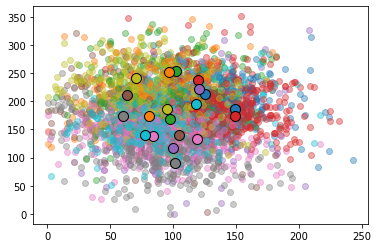

In [25]:
for indexes in clusters:
    plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)
for c in centers:
    plt.scatter(c[i], c[j], s=100, edgecolors='k')

# K-Mode

https://github.com/nicodv/kmodes

In [95]:
from kmodes.kmodes import KModes

In [102]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(X1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 3267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4273.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4014.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 4024.0
Best run was number 1


In [103]:
km.cluster_centroids_

array([['WV', 'no', 'no'],
       ['WV', 'no', 'yes'],
       ['OK', 'no', 'no'],
       ['IL', 'yes', 'no']], dtype='<U3')

In [105]:
km.labels_

array([1, 1, 0, ..., 0, 3, 1], dtype=uint16)

# Rock

https://github.com/annoviko/pyclustering/

In [106]:
from pyclustering.cluster import rock

In [111]:
rc = rock.rock(X2, eps=0.7, number_clusters=4, threshold=0.5)
rc.process()

/Users/riccardo/opt/anaconda3/lib/python3.7/site-packages/pyclustering/utils/__init__.py:324: RuntimeWarning: overflow encountered in ubyte_scalars
  distance += (a[i] - b[i])**2.0;


KeyboardInterrupt: 

# Trasactional Clustering Algorithms in Python 2.7

https://github.com/riccotti/TX-Means